# 6. Decision Trees and Ensemble Learning

Source: https://knowmledge.com/2023/10/16/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-1/

This week, we'll talk about decision trees and tree-based ensemble algorithms

This project involves building a model to help banks decide whether to approve or reject loan applications. 

For example, if you apply for a loan to buy a phone, the bank uses details like your income, phone price, and loan amount to calculate a risk score. This score predicts the likelihood of you defaulting (not repaying the loan).

The model uses historical data from past customers, including their loan amounts and whether they repaid ("OK") or defaulted ("DEFAULT"). This is treated as a binary classification problem, where:

Target variable (y): 0 = OK (repayment), 1 = DEFAULT.

Goal: Predict the probability of default for new customers using their information (X).

The dataset includes a "Status" column indicating repayment outcomes. The model’s output helps the bank make informed lending decisions by estimating default risk.

## 6.1 Credit risk scoring project

This section explains how to prepare and process data for the credit risk model. It has two main parts:

1. Preparation Steps
 - Import libraries: Use tools like:
 - NumPy (math/arrays), Pandas (data handling), Scikit-Learn (machine learning tools, imported later).
 - Matplotlib/Seaborn (for graphs and visuals).
 - Download the dataset, preview the CSV file, and adjust column formats to make the data consistent.

2. Data Transformation & Splitting
 - Re-encode categorical variables (convert text/data categories into numbers for the model to understand).
 - Split data into training, validation, and test sets. This helps train the model, tune it, and check its accuracy later.

Goal: Organize and clean the data so it’s ready for building the loan default prediction model.


Dataset: https://github.com/gastonstat/CreditScoring

In [1]:
# By ensuring that we have these libraries at our disposal, we’ll be well-equipped to tackle the various tasks involved in our credit risk scoring project.

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2.0 Preparation Steps

Source: https://knowmledge.com/2023/10/17/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-2/

* Download the dataset, preview the CSV file, and adjust column formats to make the data consistent.
<!-- * Re-encoding the categorical variables -->
<!-- * Doing the train/validation/test split -->

### Downloading the dataset

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
# !wget $data  #Console command, which starts with ‘!’, allows us to download the CSV file from the web. We

### Previewing the CSV File

We can gain an initial overview of the CSV file by using the ‘head’ function. This function works with text files and provides a quick look at the file’s content, 

In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Adapting Column Format

In [6]:
df.columns = df.columns.str.lower()  #As a first step, we’ll lowercase all the column names for consistency:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## 6.2.1 Data cleaning and preparation – Data Transformation and Splitting
Source: https://knowmledge.com/2023/10/18/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-3/

This section focuses on cleaning and preparing the data for the model. Here’s what’s covered:

1. Handling Categorical Data
- Missing values: Coded as 99999999 – these need fixing (e.g., removing or replacing).
- Re-encode variables: Convert numbers back to meaningful categories using info from an R file:
  - Status: 1 = "good" (repaid), 2 = "bad" (default), 0 = "unknown" (rare case).
  - Home: Categories like "rent," "owner," "parents," etc.
  - Marital: "single," "married," "widow," etc.
  - Records: "yes" or "no."
  - Job: "fixed," "partime," "freelance," etc.

2. Splitting the Data
- Divide the dataset into training, validation, and test sets:
  - Training: Teach the model.
  - Validation: Tune model settings.
  - Test: Check final accuracy.

Goal: Make the data understandable for the model and ensure reliable testing.

In [7]:
# To map these values accordingly, we can use the ‘map’ method. This method takes a dictionary that maps each original dataframe value to a new value.
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### Missing values
With all categorical variables decoded back to strings, the next step is to address the missing values.



In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
df.income.max()

np.int64(99999999)

In [13]:
df.income.replace(to_replace=99999999, value=np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [14]:
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

In [15]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

In [16]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [17]:
df = df[df.status != 'unk'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


### Performing the train/validation/test split

The final step in our data preparation is to split the dataset into training, validation, and test sets. We achieve this using the ‘train_test_split’ function from scikit-learn.

In [18]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

In [21]:
(df_train.status == 'default').astype('int')

0       1
1       1
2       0
3       1
4       0
       ..
2667    0
2668    0
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int64

In [22]:
# To complete our data preparation, we need to assign target variables for the training, validation, and test sets.
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [23]:
# To prevent accidental use of the target variable during training, we should remove it from ‘df_train,’ ‘df_val,’ and ‘df_test.’
del df_train['status']
del df_val['status']
del df_test['status']

In [24]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 6.3 Decision trees

Source: https://knowmledge.com/2023/10/19/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-4/

Decision trees are interpretable, versatile tools in machine learning and data analysis used for tasks like classification and regression. They employ a tree-like structure where internal nodes represent input features, branches denote decisions (e.g., true/false outcomes based on conditions), and leaf nodes provide final predictions (e.g., "OK" or "DEFAULT"). Their simplicity and transparency make them valuable for solving complex problems. The structure begins with a root node (initial condition), splits into branches depending on decision outcomes, and progresses through subsequent nodes until reaching terminal leaves that deliver the result.

* How a decision tree looks like
* Training a decision tree 
* Overfitting
* Controlling the size of a tree

In [25]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [26]:
# just take one record to test
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [27]:
assess_risk(xi)

'ok'

### Training a decision tree
Before we can train a decision tree, we first need to import necessary packages. From Scikit-Learn, we import DecisionTreeClassifier. Because we have categorical variables, we also need to import DictVectorizer as seen before.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [29]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [30]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [31]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]

In [34]:
roc_auc_score(y_val, y_pred)

np.float64(0.6671732338766319)

### Overfitting
0.65 is not really a great value, let’s look at training data and calulate auc score.

In [35]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

In [36]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


### Decision Stump
If we restrict the depth to 3, the model performance on validation is significantly better. It’s now 74% compared to 65%. By the way a decistion tree with a depth of 1 is called Decision Stump. It’s not really a tree, because this is only one condition.

In [38]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)
# Output: train 0.6282660131823559
 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)
# Output: val 0.6058644740984719

train 0.6282660131823559
val 0.6058644740984719


#### Visualizing Decision Stump
Let’s examine this tree to understand the rules it has learned. To do that, we can use a specialized function in Scikit-Learn for visualizing trees.

In [39]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- class: 0
|--- feature_26 >  0.50
|   |--- class: 1



In [40]:
# in the video Alexey uses 
# print(export_text(dt,feature_names=dv.get_feature_names()))

names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



### Decision tree with depth of 2

In [41]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)
# Output: train 0.7054989859726213
 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)
# Output: val 0.6685264343319367

train 0.7054989859726213
val 0.6685264343319367


#### Visualizing Decision tree

In [42]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1



In [43]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## 6.4 Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

Source: https://knowmledge.com/2023/10/21/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-6/

In [44]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


### Finding the best split for one column

We aim to train a decision tree using the numerical column **'assets'** by determining the optimal threshold **T** for the split condition **ASSETS > T**. The goal is to split the dataset into two subsets:  
1. **DF_LEFT**: Records where **'assets' ≤ T** (condition is **FALSE**).  
2. **DF_RIGHT**: Records where **'assets’ > T** (condition is **TRUE**).  

To find the best **T**:  
- **Sort the dataset** by the **'assets'** column.  
- Evaluate potential thresholds (values of **T**) to identify the split that **best separates the data** based on the chosen criterion (e.g., maximizing class purity, minimizing error, or optimizing metrics like Gini impurity or entropy).  

The **best split** is the threshold **T** that creates the most homogeneous or distinct groups (DF_LEFT and DF_RIGHT) for the target outcome. This process, called **splitting**, forms the foundation of decision tree learning, where the tree uses these splits to make decisions.

What we can do now is sorting the data by the ‘assets’ column.

In [45]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [46]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [47]:
from IPython.display import display

In [48]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [49]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]
 
display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


#### Misclassification Rate

In [50]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [51]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
     
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
 
    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



#### Impurity
The misclassification rate is just one way of measuring impurity. We aim for our leaves to be as pure as possible, meaning that the groups resulting from the split should ideally contain only observations of one class, making them pure. The misclassification rate informs us of how impure these groups are by quantifying the error rate in classifying observations.

There are also alternative methods to measure impurity. Scikit-Learn offers more advanced criteria for splitting, such as entropy and Gini impurity. These criteria provide different ways to evaluate the quality of splits, with the goal of creating decision trees with more homogeneous leaves.

| T    | Decision LEFT | Impurity LEFT | Decision RIGHT | Impurity RIGHT | AVG  |
|------|---------------|---------------|----------------|----------------|------|
| 0    | DEFAULT       | 0%            | OK             | 43%            | 21%  |
| 2000 | DEFAULT       | 0%            | OK             | 33%            | 16%  |
| 3000 | DEFAULT       | 0%            | OK             | 20%            | 10%  |
| 4000 | DEFAULT       | 25%           | OK             | 25%            | 25%  |
| 5000 | DEFAULT       | 50%           | OK             | 50%            | 50%  |
| 8000 | DEFAULT       | 43%           | OK             | 0%             | 21%  |

We observe that the split with T = 3000 yields the lowest average misclassification rate, resulting in the best impurity of 10%. This is how we determine the best split when dealing with just one column. To summarize our approach:

- We sort the dataset.
- We identify all possible thresholds.
- For each of the thresholds, we split the dataset.
- For each split, we calculate the impurity on the left and the right.
- We then compute the average impurity.
- Among all the splits considered, we select the one with the lowest average impurity.

The decision tree we’ve learned based on this split is as follows:

### Finding the best split for two columns
Previously, we began with a simple example that involved just one feature. Now, let’s explore what happens when we introduce another feature, ‘debt.’ This feature represents the amount of debt that clients have.

In [52]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [53]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


Possible thresholds:

- T = 500 (DEBT<=500 becomes LEFT, DEBT>500 becomes RIGHT)
- T = 1000 (DEBT<=1,000 becomes LEFT, DEBT>1,000 becomes RIGHT)
- T = 2000 (DEBT<=2,000 becomes LEFT, DEBT>2,000 becomes RIGHT)

So we’ve seen how it works for only one feature. Let’s generalize a bit and put both threshold variables in a dictionary. If there are more features, we can put them here as well.

In [54]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [55]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


### Finding the best split algorithm for multiple features

```
FOR each feature in FEATURES:
    FIND all thresholds for the feature
    FOR each threshold in thresholds:
        SPLIT the dataset using "feature > threshold" condition
        COMPUTE the impurity of this split
SELECT the condition with the LOWEST IMPURITY
```

We may need to establish some stopping criteria. This is because we apply recursive splitting, but how do we determine when to stop?

#### Stopping Criteria for Decision Trees 
Stopping criteria determine when to stop splitting nodes during decision tree creation, preventing overfitting and ensuring a balance between model complexity and generalization. These rules are crucial and depend on the dataset and problem. Here are the common criteria:  

1. **Pure Node**: Stop splitting if all samples in a node belong to the same class (no further splits add value).  
2. **Depth Limit (max_depth)**: Stop if the tree reaches a predefined depth to avoid excessive complexity.  
3. **Minimum Sample Threshold (min_samples_leaf)**: Stop if a node has too few samples to split, ensuring simpler, more interpretable trees.  

By enforcing these rules, the model stays simple and avoids overfitting. The next article will explore parameter tuning, which involves adjusting these criteria for optimal performance.

#### Decision Tree Learning Algorithm
- ****Find the Best Split:****
For each feature evaluate all splits based on all possible thresholds and select this one that has the lowest impurity.
- ****Stop if Max Depth is Reached:****
Stop the splitting process if the maximum allowable depth of the tree is reached.
- ****If LEFT is Sufficiently Large and Not Pure Repeat for LEFT:****
If the left subset of data is both sufficiently large and not pure (contains more than one class), repeat the splitting process for the left subset.
- ****If RIGHT is Sufficiently Large and Not Pure Repeat for RIGHT:****
Similarly, if the right subset of data is both sufficiently large and not pure, repeat the splitting process for the right subset.

## 6.5 Decision trees parameter tuning

Source: https://knowmledge.com/2023/10/23/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-8/

The **"Decision Trees and Ensemble Learning"** section is about adjusting the settings (called **parameters**) of a decision tree to make it work better. Think of these settings like knobs you can turn to control how the tree "learns" from the data. The goal is to pick the best settings so the model gets the **highest score** (like AUC, which measures how well it predicts) or the **lowest error** (like RMSE) on a test set.  

Here’s what the main settings do:  

1. **`criterion`**:  
   - This decides *how the tree splits the data*.  
   - You can choose "gini" or "entropy" (two math rules for splitting).  
   - The choice affects how good the splits are.  

2. **`max_depth`**:  
   - Controls *how deep the tree can grow*.  
   - Too deep? The tree might memorize the training data (bad for new data).  
   - Too shallow? The tree might miss important patterns.  
   - You need to find a balance.  

3. **`min_samples_leaf`**:  
   - Sets *the smallest number of examples a leaf (end node) must have*.  
   - Small number = tree makes very detailed splits (might overfit).  
   - Big number = simpler splits (might underfit).  

By testing different combinations of these settings, you can create a tree that’s not too simple or too complicated, and works well for your problem. It’s like tuning a car engine to run smoothly for a specific race!

### Selecting max_depth
To start the parameter tuning process, our initial focus will be on the ‘max_depth‘ parameter. Our goal is to identify the optimal ‘max_depth‘ value before proceeding to fine-tune other parameters. ‘max_depth‘ governs the maximum depth of the decision tree. When set to ‘None,’ it imposes no restrictions, allowing the tree to grow as deeply as possible, potentially resulting in numerous layers.

We will conduct experiments using various values for ‘max_depth,’ including the ‘None’ setting, which serves as a baseline for comparison and enables us to understand the consequences of not constraining the tree’s depth.

In [56]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.748
  10 -> 0.695
  15 -> 0.667
  20 -> 0.649
None -> 0.664


### Selecting min_samples_leaf
But ‘max_depth‘ is not the only parameter; there is another one called ‘min_samples_leaf.’ We have already determined that the optimal depth falls between 4 and 6. For each of these values, we can experiment with different ‘min_samples_leaf‘ values to observe their effect

In [57]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [58]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


In [59]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
19,6,15,0.785474
18,6,10,0.777521
22,6,100,0.776434
12,5,20,0.773537
20,6,20,0.773337


In [60]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.760
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.773  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

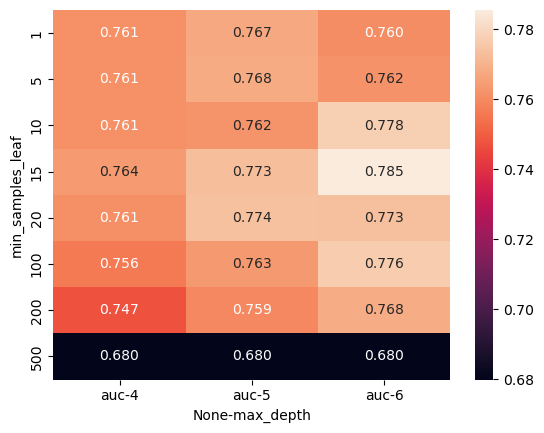

In [61]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [62]:
scores = []
 
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
 
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
4,4.0,15,0.785695
13,5.0,15,0.785474
22,6.0,15,0.785080
31,7.0,15,0.785080
40,10.0,15,0.785080


In [63]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.758  0.750  0.754  0.749  0.747  0.751  0.750  0.744
2                 0.751  0.763  0.754  0.767  0.761  0.765  0.750  0.756
5                 0.762  0.763  0.760  0.760  0.762  0.760  0.762  0.761
10                0.778  0.778  0.778  0.778  0.778  0.778  0.778  0.778
15                0.785  0.786  0.785  0.785  0.785  0.785  0.785  0.785
20                0.773  0.773  0.774  0.774  0.774  0.774  0.774  0.774
100               0.776  0.776  0.776  0.776  0.776  0.776  0.776  0.776
200               0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

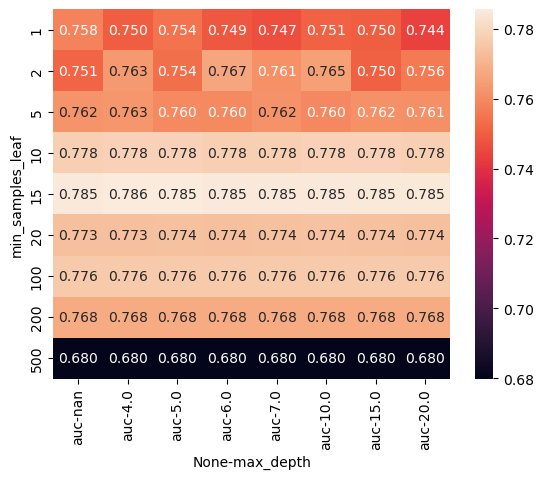

In [64]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [65]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [66]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

## 6.6 Ensembles and random forest

Source: https://knowmledge.com/2023/10/24/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-9/

* Board of experts
* Ensembling models 
* Random forest - ensembling decision trees
* Tuning random forest


**Simplified Explanation of Ensemble Models and Random Forests**

Imagine a bank needs to decide whether to approve a loan. Instead of asking just one expert, they consult a **board of five experts**. Each expert reviews the application independently, and the bank follows the majority vote. This way, the combined wisdom of the group leads to better decisions than relying on one person. This idea is called **ensemble modeling**—using multiple models (like a team of experts) to improve accuracy.

**From Experts to Models:**  
Instead of human experts, imagine five computer models (named g1, g2, etc.). Each model predicts the chance a customer will default on a loan. The bank averages these predictions to make the final decision. For example:  
- Model 1 predicts a 10% risk.  
- Model 2 predicts 15%.  
- Model 3 predicts 12%.  
- The average is (10 + 15 + 12)/3 = ~12.3% risk.  

**Why "Random Forest"?**  
If all models were identical (like clones), they’d all make the same prediction, which isn’t helpful. A **random forest** solves this by adding randomness:  
1. **Different Data for Each Model:** Each decision tree is trained on a random subset of customer data (like shuffling a deck of cards and dealing different hands).  
2. **Different Features for Each Tree:** Each tree also uses a random subset of customer details. For example:  
   - Tree 1 uses “income” and “debt.”  
   - Tree 2 uses “income” and “credit score.”  
   - Tree 3 uses “debt” and “credit score.”  

This randomness ensures the trees are diverse, like experts with different specialties.  

**Example with 3 Features:**  
Suppose a customer’s application includes three details: **assets**, **debt**, and **price**. A random forest with three trees might assign features like this:  
- Tree 1: Assets + Debt  
- Tree 2: Assets + Price  
- Tree 3: Debt + Price  

Each tree makes a prediction, and the final result is the average of all three.  

**Key Points:**  
- **Ensemble models** combine multiple models to improve decisions (like a team vote).  
- **Random forests** are ensembles of decision trees that use randomness in data and features to avoid identical trees.  
- **Tuning** adjusts the forest’s settings (like the number of trees or features used) to optimize performance.  

This method makes the model more reliable, just like trusting a diverse group of experts instead of one person.

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# n_estimators - number of models we want to use
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [69]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# Output: 0.781835024581628

np.float64(0.7813052481170231)

In [70]:
 rf.predict_proba(X_val[[0]])
# Output: array([[1., 0.]])

array([[0.9, 0.1]])

In [71]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [72]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7744726453706618)

In [73]:
rf.predict_proba(X_val[[0]])
# Output: array([[0.9, 0.1]])

array([[0.9, 0.1]])

### Tuning random forest
Let’s delve into the possibilities of fine-tuning our random forest model. To start, we’ll explore how the model’s performance evolves when we increase the number of estimators or models it employs. Our approach will involve iterating over a range of values to observe how the model’s performance improves or changes with an increasing number of trees.

In [74]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [75]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


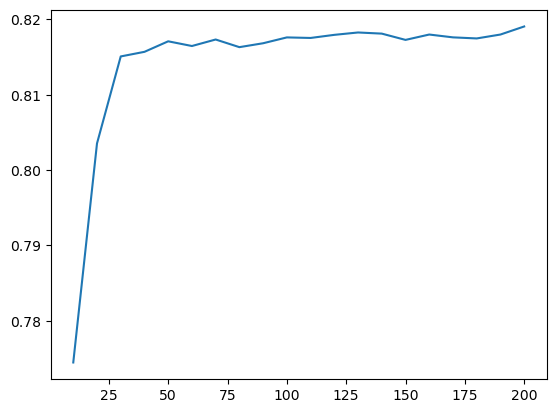

In [76]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [77]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [78]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


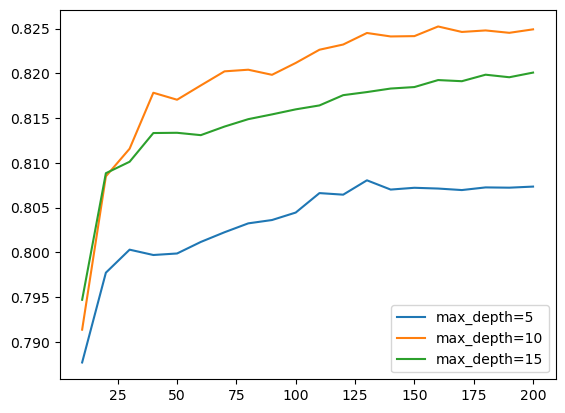

In [79]:
# Let's plot it
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [80]:
# Let's select 10 as the best value
max_depth = 10

In [81]:
###Now, we’ll proceed to find the optimal value for the ‘min_samples_leaf’ parameter using a similar method 
#as before.
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [82]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [83]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

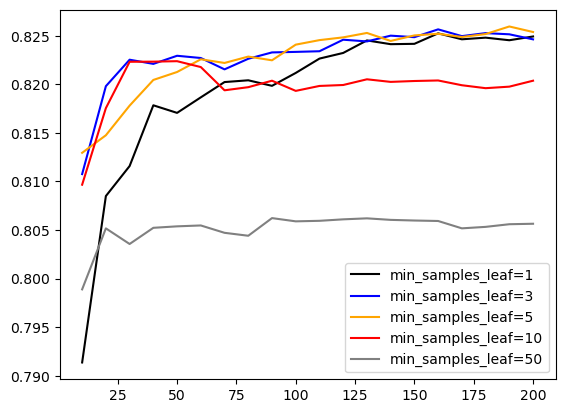

In [84]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [85]:
# Let's select 3 as the best value
min_samples_leaf = 3

In [86]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:

### Key Parameters in Random Forest  

- **max_features** – Controls how many features each tree gets, ensuring variety in trees.  
- **bootstrap** – Adds randomness by selecting different data samples for each tree.  
- **n_jobs** – Speeds up training by running trees in parallel. ‘None’ means no parallelization, while ‘-1’ uses all processors.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## 6.7 Gradient boosting and XGBoost

Source: https://knowmledge.com/2023/10/25/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-10/

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output

**Simplified Explanation of Gradient Boosting and XGBoost (Part 1/2):**  

**What is Boosting?**  
Boosting is a method where **multiple models are trained one after another**, with each new model fixing the mistakes of the previous one. Think of it like a team of students: the first student takes an exam, makes errors, and the next student studies those errors to improve. This repeats until the final "team answer" is much better.  

**Gradient Boosting vs. Random Forest**  
- **Random Forest**:  
  - Trains **many independent decision trees** at the same time (e.g., 10 trees).  
  - Final prediction = **average of all tree predictions** (like taking a group vote).  

- **Gradient Boosting**:  
  - Trains models **sequentially** (one after another).  
  - **Step-by-step process**:  
    1. First model (e.g., Model 1) makes predictions.  
    2. Errors from Model 1 are calculated.  
    3. Second model (Model 2) is trained to **correct Model 1’s errors**.  
    4. Errors from Model 2 are passed to Model 3, and so on.  
  - Final prediction = **combined results of all models**, with each new model "fixing" the previous ones.  

**Key Idea**:  
Boosting focuses on **learning from mistakes over time**, while random forests rely on averaging many independent opinions.  

**XGBoost**:  
- A popular library used to implement **gradient boosting** efficiently.  
- Designed specifically for building boosted decision trees.  

**Why Does This Matter?**  
- Gradient boosting often achieves higher accuracy than random forests by **iteratively improving errors**.  
- XGBoost is widely used in competitions and real-world applications for its speed and performance.  


In [87]:
# !pip install xgboost

In [88]:
# XGBoost is a library known for its highly effective implementation of gradient boosting
import xgboost as xgb

### Training the first model
The first step in the process is to structure the training data into a specialized data format known as ‘DMatrix.’ This format is optimized for training XGBoost models, allowing for faster training.

XGBoost Parameters – Some of the most crucial parameters include:

- eta: This parameter represents the learning rate, determining how quickly the model learns.
- max_depth: Similar to random forests and decision trees, ‘max_depth’ controls the size of the trees.
- min_child_weight: This parameter controls the minimum number of observations that should be present in a leaf node, similar to the ‘min_samples_leaf’ in decision trees.
- objective: Since we have a binary classification task, where we aim to classify clients into ‘defaulting’ or ‘non-defaulting,’ we need to specify the ‘objective.’ There are various objectives available for different types of problems, including regression and classification.
- nthread: XGBoost has the capability to parallelize training, and here, we specify how many threads to utilize.
- seed: This parameter controls the randomization used in the model.
- verbosity: It allows us to control the level of detail in the warnings and messages generated during training

In [89]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [90]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [91]:
## Now, we’re ready to test the model. To do this, we can simply use the predict function of the XGBoost model. 
# It returns a one-dimensional array with the model’s predictions
y_pred = model.predict(dval)

In [92]:
roc_auc_score(y_val, y_pred)

np.float64(0.8065256351262986)

### Performance Monitoring
In XGBoost, it’s feasible to monitor the performance of the training process, allowing us to closely observe each stage of the training procedure. To achieve this, after each iteration where a new tree is trained, we can promptly evaluate its performance on our validation data to assess the results. For this purpose, we can establish a watchlist that comprises the datasets we intend to use for evaluation.

In [93]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [94]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-logloss:0.49703	val-logloss:0.54305
[1]	train-logloss:0.44463	val-logloss:0.51462
[2]	train-logloss:0.40707	val-logloss:0.49896
[3]	train-logloss:0.37760	val-logloss:0.48654
[4]	train-logloss:0.35990	val-logloss:0.48007
[5]	train-logloss:0.33931	val-logloss:0.47563
[6]	train-logloss:0.32586	val-logloss:0.47413
[7]	train-logloss:0.31409	val-logloss:0.47702
[8]	train-logloss:0.29962	val-logloss:0.48205
[9]	train-logloss:0.29216	val-logloss:0.47996
[10]	train-logloss:0.28407	val-logloss:0.47969
[11]	train-logloss:0.27583	val-logloss:0.47888
[12]	train-logloss:0.27127	val-logloss:0.47697
[13]	train-logloss:0.26525	val-logloss:0.47871
[14]	train-logloss:0.25734	val-logloss:0.48096
[15]	train-logloss:0.25186	val-logloss:0.48160
[16]	train-logloss:0.24849	val-logloss:0.47982
[17]	train-logloss:0.24144	val-logloss:0.48086
[18]	train-logloss:0.23796	val-logloss:0.47978
[19]	train-logloss:0.23390	val-logloss:0.47857
[20]	train-logloss:0.22833	val-logloss:0.48036
[21]	train-logloss:0.22

In [95]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [96]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

### Parsing xgboost’s monitoring output
When you’re interested in visualizing this information on a plot, one of the challenges with XGBoost is that it doesn’t provide an easy way to extract this information since it’s printed to standard output. However, in Jupyter Notebook, there’s a method to capture whatever is printed to standard output and manipulate it. You can use the command %%capture output to achieve this. It captures all the content that the code outputs into a special object, which you can then use to extract the information. It’s worth noting that although something is happening in the code, we won’t see any output because it’s being captured.

In [97]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
s = output.stdout
 
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [99]:
s.split('\n')

['[0]\ttrain-auc:0.86730\tval-auc:0.77938',
 '[5]\ttrain-auc:0.93086\tval-auc:0.80858',
 '[10]\ttrain-auc:0.95447\tval-auc:0.80851',
 '[15]\ttrain-auc:0.96554\tval-auc:0.81334',
 '[20]\ttrain-auc:0.97464\tval-auc:0.81729',
 '[25]\ttrain-auc:0.97953\tval-auc:0.81686',
 '[30]\ttrain-auc:0.98579\tval-auc:0.81543',
 '[35]\ttrain-auc:0.99011\tval-auc:0.81206',
 '[40]\ttrain-auc:0.99421\tval-auc:0.80922',
 '[45]\ttrain-auc:0.99548\tval-auc:0.80842',
 '[50]\ttrain-auc:0.99653\tval-auc:0.80918',
 '[55]\ttrain-auc:0.99765\tval-auc:0.81114',
 '[60]\ttrain-auc:0.99817\tval-auc:0.81172',
 '[65]\ttrain-auc:0.99887\tval-auc:0.80798',
 '[70]\ttrain-auc:0.99934\tval-auc:0.80870',
 '[75]\ttrain-auc:0.99965\tval-auc:0.80555',
 '[80]\ttrain-auc:0.99979\tval-auc:0.80549',
 '[85]\ttrain-auc:0.99988\tval-auc:0.80374',
 '[90]\ttrain-auc:0.99993\tval-auc:0.80409',
 '[95]\ttrain-auc:0.99996\tval-auc:0.80548',
 '[100]\ttrain-auc:0.99998\tval-auc:0.80509',
 '[105]\ttrain-auc:0.99999\tval-auc:0.80629',
 '[110]\tt

In [100]:
line = s.split('\n')[0]
line
# Output: '[0]\ttrain-auc:0.86730\tval-auc:0.77938'
 
line.split('\t')
# Output: ['[0]', 'train-auc:0.86730', 'val-auc:0.77938']
 
num_iter, train_auc, val_auc = line.split('\t')
num_iter, train_auc, val_auc
# Output: ('[0]', 'train-auc:0.86730', 'val-auc:0.77938')
 
int(num_iter.strip('[]'))
# Output: 0
float(train_auc.split(':')[1])
# Output: 0.8673
float(val_auc.split(':')[1])
# Output: 0.77938

0.77938

In [101]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [102]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


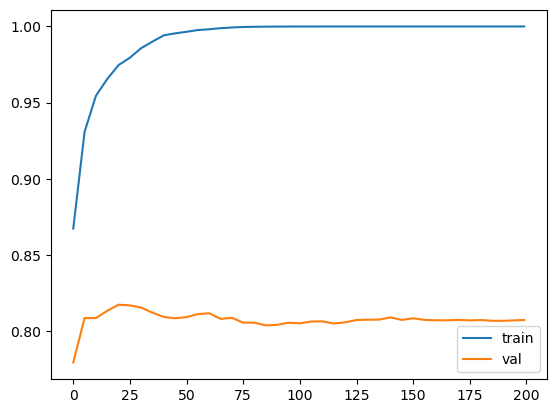

In [103]:
# x-axis - number of iterations
# y-axis - auc
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

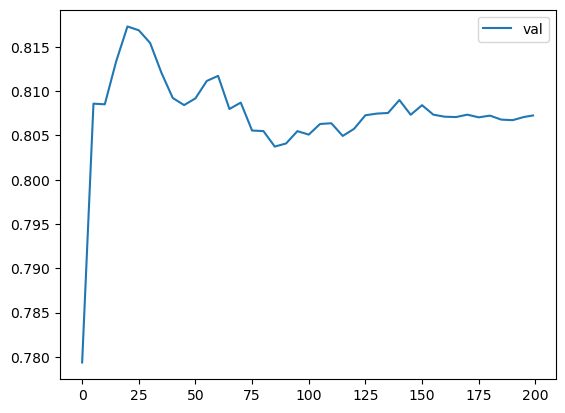

In [104]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## 6.8 XGBoost parameter tuning

Source: https://knowmledge.com/2023/10/27/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-12/

Tuning the following parameters:

* `eta`
* `max_depth`
* `min_child_weight`

This part is about XGBoost parameter tuning. We begin by tuning the initial parameter – ‘eta‘. The subsequent article will explore parameter tuning for ‘max_depth‘ and ‘min_child_weight‘. In the final phase, we’ll train the final model. Let’s start tuning the first parameter.

### Tuning Eta
Eta, also known as the learning rate, determines the influence of the following model when correcting the results of the previous model. If the weight is set to 1.0, all new predictions are used to correct the previous ones. However, when the weight is 0.3, only 30% of the new predictions are considered. In essence, eta governs the size of the steps taken during the learning process.

Now, let’s explore how different values of eta impact model performance. To facilitate this, we’ll create a dictionary called ‘scores‘ to store the performance scores for each value of eta.


### Eta = 0.3

In [105]:
scores = {}

In [106]:
%%capture output
 
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [107]:
'eta=%s' % (xgb_params['eta'])

'eta=0.3'

In [108]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [109]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86730  0.77938
 1          5    0.93086  0.80858
 2         10    0.95447  0.80851
 3         15    0.96554  0.81334
 4         20    0.97464  0.81729
 5         25    0.97953  0.81686
 6         30    0.98579  0.81543
 7         35    0.99011  0.81206
 8         40    0.99421  0.80922
 9         45    0.99548  0.80842
 10        50    0.99653  0.80918
 11        55    0.99765  0.81114
 12        60    0.99817  0.81172
 13        65    0.99887  0.80798
 14        70    0.99934  0.80870
 15        75    0.99965  0.80555
 16        80    0.99979  0.80549
 17        85    0.99988  0.80374
 18        90    0.99993  0.80409
 19        95    0.99996  0.80548
 20       100    0.99998  0.80509
 21       105    0.99999  0.80629
 22       110    1.00000  0.80637
 23       115    1.00000  0.80494
 24       120    1.00000  0.80574
 25       125    1.00000  0.80727
 26       130    1.00000  0.80746
 27       135    1.00000  0.80753
 28

In [110]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


### Eta = 1.0

In [111]:
%%capture output
 
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [112]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [113]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.95857,0.79136
2,10,0.98061,0.78355
3,15,0.99549,0.78050
4,20,0.99894,0.78591
5,25,0.99989,0.78401
6,30,1.00000,0.78371
7,35,1.00000,0.78234
8,40,1.00000,0.78184
9,45,1.00000,0.77963


### Eta = 0.1
Let’s go through the process once more for ‘eta=0.1’ and subsequently print out the dataframe.

In [114]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [115]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [116]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804
5,25,0.94638,0.82065
6,30,0.95338,0.82063
7,35,0.95874,0.82404
8,40,0.96325,0.82644
9,45,0.96694,0.82602


### Eta = 0.05
Let’s do it again for ‘eta=0.05’ and print out the dataframe.

In [118]:
%%capture output
 
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [119]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [120]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.88650,0.79584
2,10,0.90368,0.79623
3,15,0.91072,0.79938
4,20,0.91774,0.80510
5,25,0.92385,0.80895
6,30,0.92987,0.81175
7,35,0.93379,0.81480
8,40,0.93856,0.81547
9,45,0.94316,0.81807


### Eta = 0.01
Once more, let’s assess the performance for ‘eta=0.01’.

In [121]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [122]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [123]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.87157,0.77925
2,10,0.87247,0.78051
3,15,0.87541,0.78302
4,20,0.87584,0.78707
5,25,0.88406,0.79331
6,30,0.89027,0.79763
7,35,0.89559,0.79914
8,40,0.89782,0.79883
9,45,0.89983,0.79845


### Plotting Eta
Now that we’ve inserted key-value pairs and gathered information from different runs, we can examine the keys in the dictionary. Next we can compare all runs of ‘eta=0.3’, ‘eta=1.0’, ‘eta=0.1’, ‘eta=0.05’, and ‘eta=0.01’.

In [124]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

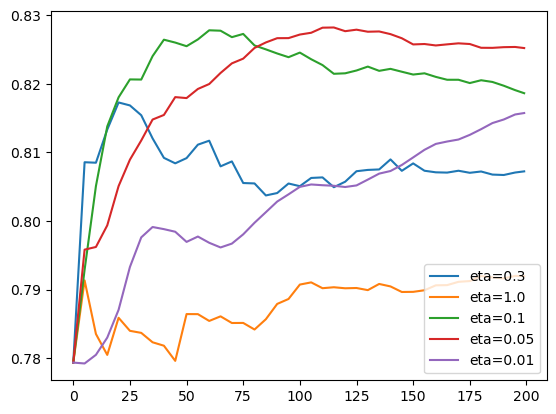

In [125]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

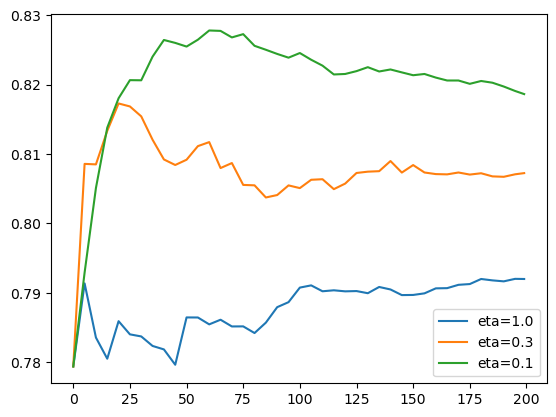

In [126]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

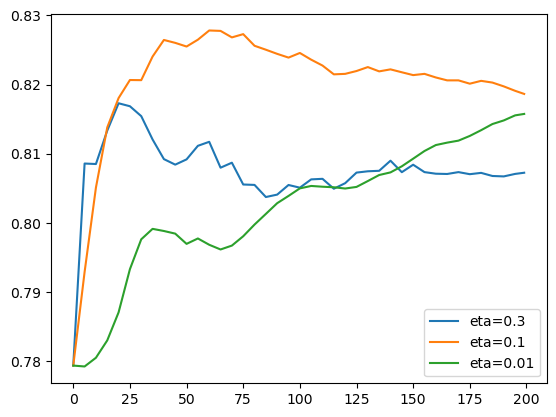

In [127]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

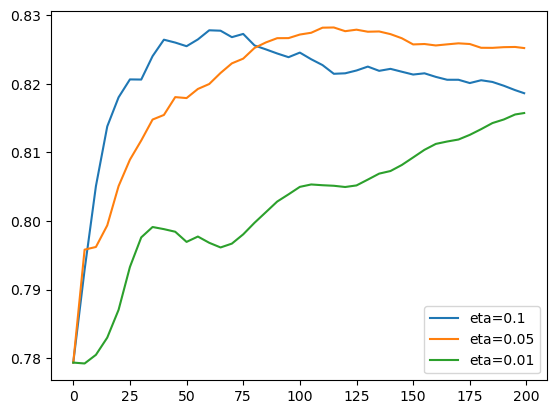

In [128]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

This is the second part about XGBoost parameter tuning. In the first part, we tuned the first parameter – ‘eta‘. Now we will explore parameter tuning for ‘max_depth‘ and ‘min_child_weight‘. Finally, we’ll train the final model.

### Tuning max_depth
#### max_depth=6
Now that we’ve set ‘eta‘ to 0.1, which we determined to be the best value, we’re going to focus on tuning the ‘max_depth‘ parameter. To do that, we’ll reset our scores dictionary to keep track of the new experiments. Initially, we’ll train a model with the same parameters as before, using it as a baseline for comparing different ‘max_depth‘ values.

In [129]:
scores = {}

In [130]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [131]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

#### max_depth=3
Now, let’s set the ‘max_depth‘ value to 3.

In [132]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [133]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

#### max_depth=4
Let’s go through the process once more for ‘max_depth=4‘.

In [134]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [135]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

#### max_depth=10
Let’s repeat the process for ‘max_depth=10‘ once more

In [136]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [137]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

### Plotting max_depth
Now that we’ve collected data from four runs, let’s plot this information and determine which model performs the best.

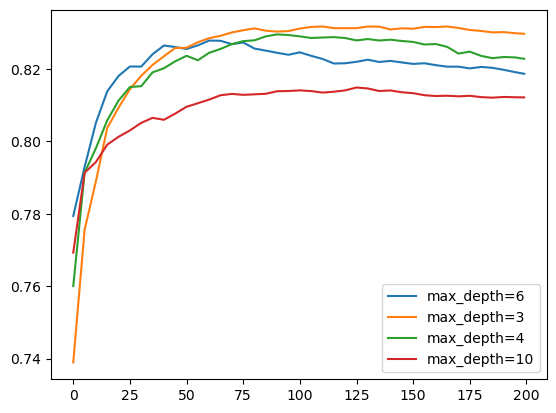

In [139]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()

In [140]:
# We see the depth of 10 is worst. So actually we can delete it by
del scores['max_depth=10']

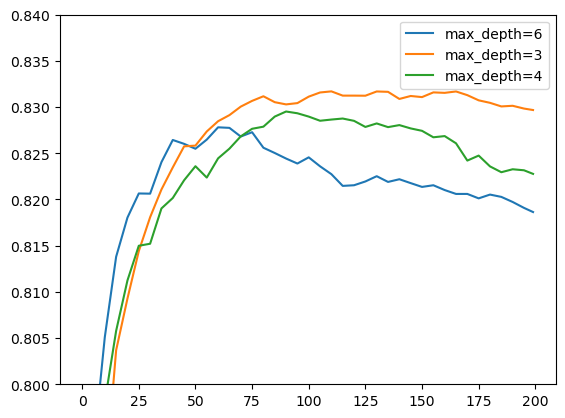

In [141]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
plt.ylim(0.8, 0.84)
plt.legend()

### Tuning min_child_weight
#### min_child_weight=1
Now, we’ll set ‘eta‘ to 0.1 and ‘max_depth‘ to 3. We’re ready to start tuning the last parameter, which is ‘min_child_weight.’ To do this, we need to reset our scores dictionary once again to track the new experiments. Initially, we’ll train a model with the same parameters as before, but we’ll set ‘min_child_weight‘ to 1. This model will serve as our baseline for comparing different ‘min_child_weight‘ values.

In [143]:
scores = {}

In [144]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [145]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

### min_child_weight=10
Now, let’s set the ‘min_child_weight‘ value to 10.

In [146]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [147]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

#### min_child_weight=30
Let’s go through the process once more for ‘min_child_weight=30‘.

In [148]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [149]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

### Plotting min_child_weight
This should give us an idea if we actually need to increase this value or not. Now we can compare all runs of ‘min_child_weight=1‘, ‘min_child_weight=10‘, and ‘min_child_weight=30‘.

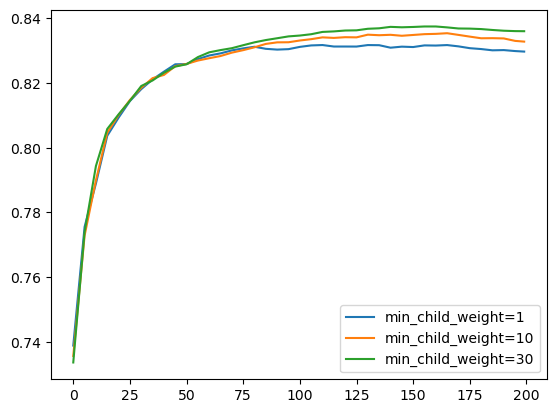

In [150]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

# plt.ylim(0.82, 0.84)
plt.legend()

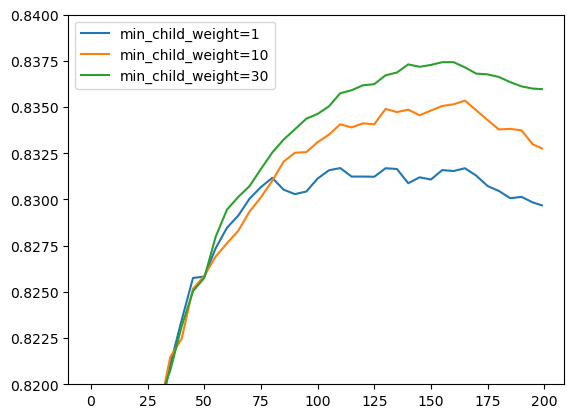

In [151]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.ylim(0.82, 0.84)
plt.legend()

### Train final model
To train the final model, we need to determine the number of iterations for training. In the video, Alexey chose to train for 175 iterations.

In [152]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [153]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Creating plots isn’t always necessary; you can analyze raw output and use tools like pen and paper or Excel for parameter tuning. The best approach depends on your needs. While eta, max_depth, and min_child_weight are key parameters, others like ‘subsample’ and ‘colsample_bytree’ are also important.  

- **colsample_bytree**: Controls how many features each tree sees per iteration (max value 1.0). Try values like 0.3 or 0.6 and fine-tune.  
- **subsample**: Controls row sampling, allowing only a percentage of training data. For example, 0.5 means selecting 50% of data randomly.  

For more insights, refer to the full **XGBoost parameters list** and explore resources like Kaggle for tuning guidelines.

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

* `subsample` and `colsample_bytree`
* `lambda` and `alpha`

## 6.9 Selecting the final model

Source: https://knowmledge.com/2023/10/29/ml-zoomcamp-2023-decision-trees-and-ensemble-learning-part-14/

This time, we revisit the best model of each type and evaluate their performance on the validation data. Based on these evaluations, we will select the overall best model and train it on the full training dataset. The final model will then be evaluated on the test set.

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

### Choosing between XGBoost, random forest and decision tree
#### Retrain the best model of each type
Let’s retrain the best Decision Tree model we had.

In [154]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [155]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [158]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Evaluate all the best of models on validation data

In [159]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7850954203095104)

In [160]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8246258264512848)

In [161]:
# XGBoost Model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8309347073212081)

### Training the final model
To train the final model, we will use the entire dataset. Following the training, we will evaluate the final model on our test dataset.

In [162]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [163]:
df_full_train = df_full_train.reset_index(drop=True)

In [165]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [166]:
del df_full_train['status']

In [167]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [171]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [172]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [173]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

### Evaluate the final model

In [174]:
y_pred = model.predict(dtest)

In [175]:
roc_auc_score(y_test, y_pred)

np.float64(0.8289367577342261)

## 6.10 Summary

* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting. 

## 6.11 Explore more

* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check `max_features` and `bootstrap`.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in `ExtraTreesClassifier`. Try it for this project.
* XGBoost can deal with NAs - we don't have to do `fillna` for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: `subsample` and `colsample_bytree`.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for [random forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) (it's the same for plain decision trees) and for [xgboost](https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost)
* Trees can also be used for solving the regression problems: check `DecisionTreeRegressor`, `RandomForestRegressor` and the `objective=reg:squarederror` parameter for XGBoost.